In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [42]:
b_hhold_train = pd.read_csv("data/B_hhold_train.csv", index_col='id')

In [43]:
b_hhold_train.head()

,RzaXNcgd,LfWEhutI,jXOqJdNL,wJthinfa,PTLgvdlQ,ZvEApWrk,euTESpHe,bDVMMSYY,aSzMhjgD,ZehDbxxy,...,YVMuyCUV,AZVtosGB,toZzckhe,BkiXyuSp,ggucvVUs,VMvwrYds,VlNidRNP,rljjAmaN,ChbSWYhO,country
id,,,,,,,,,,,,,,,,,,,,,
57071,zTghO,pYfmQ,lNhMv,42,RQnVj,103,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,pdvWY,LLuZj,qpzpO,kZRgh,VwGOP,DScEf,SKBnS,Enull,B
18973,zTghO,pYfmQ,lNhMv,34,iuxWN,-2,OLVWN,FDqwJ,ufugi,IbWRL,...,nZcTi,XrijK,LLuZj,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
20151,zTghO,pYfmQ,lNhMv,34,iuxWN,313,OMRWa,FDqwJ,rxJJI,IbWRL,...,nZcTi,FEjSW,lmjln,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
5730,zTghO,pYfmQ,lNhMv,58,iuxWN,138,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,XrijK,lmjln,ZZzXr,kZRgh,VwGOP,ZwQQe,SKBnS,Enull,B
35033,zTghO,pYfmQ,lNhMv,122,iuxWN,68,OLVWN,FDqwJ,rxJJI,IbWRL,...,nZcTi,CRHYU,lmjln,qpzpO,kZRgh,VwGOP,WFgZH,SKBnS,Enull,B


In [44]:
b_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB


In [45]:
from pandas.api.types import is_numeric_dtype

In [46]:
def impute_vals(df):
    for column in df.columns:
        if(is_numeric_dtype(df[column])):
            df[column].fillna(df[column].mean(), inplace=True)
    
    return df

In [47]:
b_filled = impute_vals(b_hhold_train)

In [48]:
b_filled.select_dtypes(include=["float64", "int64"]).head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,IrxBnWxE,BRzuVmyf,dnlnKrAg,VyHofjLM,GrLBZowF,oszSdLhD,aAufyreG,cDhZjxaW,OSmfjCbE,IOMvIGQS
id,,,,,,,,,,,,,,,,,,,,,
57071,42,103,67,-7.509967,16,158.354633,-33.279775,301.10623,98,-18,...,0.647059,15.0,-15927.000000,2,-4,1,66.000000,-59,-339.568291,100
18973,34,-2,92,-7.509967,16,158.354633,-33.279775,301.10623,-7,-38,...,0.647059,21.0,-15965.135338,2,-4,1,21.000000,-59,-339.568291,75
20151,34,313,97,-7.509967,24,158.354633,-33.279775,301.10623,308,-10,...,0.647059,66.0,-15965.135338,2,-10,1,45.782178,1,-339.568291,150
5730,58,138,-64,-7.509967,24,150.000000,-33.279775,305.00000,133,-48,...,0.647059,36.0,-15965.135338,2,-184,1,45.782178,-59,-506.000000,100
35033,122,68,-54,-7.509967,24,0.000000,-33.279775,5.00000,63,-28,...,0.647059,15.0,-15965.135338,2,-244,1,45.782178,-39,-6.000000,50


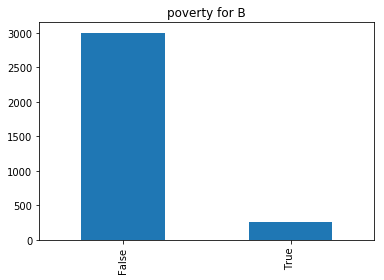

In [49]:
b_filled.poor.value_counts().plot.bar(title="poverty for B")

In [50]:
# get equal measure of 'false' and 'true' for validation set
b_true = b_filled[b_filled.poor == 1]
b_false = b_filled[b_filled.poor == 0]
print(b_true.shape)
b_false.shape

(251, 442)


(3004, 442)

In [58]:
true_ids = b_true.index.tolist()
false_ids = b_false.index.tolist()
b_val_true_ids = true_ids[:51]
b_train_true_ids = true_ids[51:]
b_val_false_ids = false_ids[:101]
b_train_false_ids = false_ids[101:]

In [59]:
b_filled_Y = b_filled.poor

In [60]:
b_filled_X = b_filled.drop('poor', axis=1)

In [61]:
b_filled_Y.head()

id
57071    False
18973    False
20151    False
5730     False
35033    False
Name: poor, dtype: bool

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
from preprocess_util import pre_process_data

In [62]:
b_filledX = pre_process_data(b_filled_X)

input shape	(3255, 441)
After standardization	(3255, 441)
After one hot encoding of categoricals	(3255, 1432)


In [64]:
b_val_true_X = b_filledX.loc[b_val_true_ids,:]
b_val_false_X = b_filledX.loc[b_val_false_ids,:]
b_val_X = pd.concat([b_val_true_X, b_val_false_X])
print(b_val_X.shape)
b_val_X.head()

(152, 1432)


,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,rljjAmaN_akDoa,rljjAmaN_fEsQq,rljjAmaN_gPPdN,ChbSWYhO_BgSQe,ChbSWYhO_Enull,ChbSWYhO_LgZDV,ChbSWYhO_OPpaN,ChbSWYhO_fWqni,ChbSWYhO_zmaYX,country_B
id,,,,,,,,,,,,,,,,,,,,,
930,-0.060772,0.065928,-0.436140,-3.415758e-14,-2.039937,0.381288,-8.422268e-14,0.028477,0.087650,-0.373802,...,0,0,0,0,1,0,0,0,0,1
95185,-0.764736,0.397503,-1.060637,-3.415758e-14,-0.890950,0.839067,-8.422268e-14,0.467280,0.413933,0.003688,...,0,0,0,0,1,0,0,0,0,1
76083,0.995173,-0.597222,0.396523,-3.415758e-14,-0.890950,0.381288,-8.422268e-14,-2.165540,-0.564915,-0.373802,...,0,0,0,0,1,0,0,0,0,1
77048,-0.060772,0.065928,0.202235,-3.415758e-14,-2.039937,-1.816052,-8.422268e-14,-2.516583,0.087650,0.192433,...,0,0,0,0,1,0,0,0,0,1
72885,0.995173,-0.928796,0.257746,-3.415758e-14,0.258037,3.127962,-8.422268e-14,2.222494,-0.891198,0.381178,...,0,0,0,0,1,0,0,0,0,1


In [67]:
b_val_true_Y = b_filled_Y.loc[b_val_true_ids]
b_val_false_Y = b_filled_Y.loc[b_val_false_ids]
b_val_Y = pd.concat([b_val_true_Y, b_val_false_Y])
print(b_val_Y.shape)
b_val_Y.tail()

(152,)


id
76117    False
17167    False
74190    False
43737    False
91602    False
Name: poor, dtype: bool

In [68]:
b_train_true_X = b_filledX.loc[b_train_true_ids,:]
b_train_false_X = b_filledX.loc[b_train_false_ids,:]
b_train_X = pd.concat([b_train_true_X, b_train_false_X])
print(b_train_X.shape)
b_train_X.head()

(3103, 1432)


,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,rljjAmaN_akDoa,rljjAmaN_fEsQq,rljjAmaN_gPPdN,ChbSWYhO_BgSQe,ChbSWYhO_Enull,ChbSWYhO_LgZDV,ChbSWYhO_OPpaN,ChbSWYhO_fWqni,ChbSWYhO_zmaYX,country_B
id,,,,,,,,,,,,,,,,,,,,,
14052,0.291210,0.065928,0.132847,-1.200363e-01,-0.890950,-1.449829e+00,-8.422268e-14,-1.287934e+00,0.087650,-0.373802,...,0,0,0,0,1,0,0,0,0,1
60082,2.403101,-0.265647,0.965510,-3.415758e-14,0.258037,-1.449829e+00,-8.422268e-14,-2.165540e+00,-0.238632,-0.373802,...,0,0,0,0,1,0,0,0,0,1
95103,1.347155,-0.265647,0.410401,-2.569591e+00,1.407023,-9.920497e-01,-8.422268e-14,-4.103267e-01,0.413933,0.381178,...,1,0,0,0,1,0,0,0,0,1
86123,0.995173,-0.928796,-0.783083,-3.415758e-14,-0.890950,3.812875e-01,-8.422268e-14,4.672801e-01,-0.891198,0.003688,...,0,0,0,0,1,0,0,0,0,1
27495,0.643192,0.065928,-1.407580,-3.415758e-14,-0.890950,-1.613347e-14,-8.422268e-14,1.829160e-14,0.087650,0.192433,...,0,0,0,0,1,0,0,0,0,1


In [70]:
b_train_true_Y = b_filled_Y.loc[b_train_true_ids]
b_train_false_Y = b_filled_Y.loc[b_train_false_ids]
b_train_Y = pd.concat([b_train_true_Y, b_train_false_Y])
print(b_train_Y.shape)
b_train_Y.head()

(3103,)


id
14052    True
60082    True
95103    True
86123    True
27495    True
Name: poor, dtype: bool

In [71]:
bX_resampled, bY_resampled = SMOTE().fit_sample(b_train_X, b_train_Y)

In [72]:
from collections import Counter

In [73]:
bX_resampled = bX_resampled.T
bX_resampled.shape

(1432, 5806)

In [74]:
print(Counter(bY_resampled).items())

dict_items([(True, 2903), (False, 2903)])


In [76]:
bY_resampled = bY_resampled.reshape(1, 5806)

In [77]:
bY_resampled.shape

(1, 5806)

In [78]:
b_filled.columns

Index(['RzaXNcgd', 'LfWEhutI', 'jXOqJdNL', 'wJthinfa', 'PTLgvdlQ', 'ZvEApWrk',
       'euTESpHe', 'bDVMMSYY', 'aSzMhjgD', 'ZehDbxxy',
       ...
       'YVMuyCUV', 'AZVtosGB', 'toZzckhe', 'BkiXyuSp', 'ggucvVUs', 'VMvwrYds',
       'VlNidRNP', 'rljjAmaN', 'ChbSWYhO', 'country'],
      dtype='object', length=442)

In [88]:
b_val_X = b_val_X.transpose()
b_val_X.shape

(1432, 152)

In [90]:
b_val_Y = b_val_Y.reshape(1, 152)
b_val_Y.shape

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(1, 152)

# MODEL

In [91]:
def initialize_parameters():
    '''inintialize the parameters for the 3 layer neural network'''
    W1 = tf.get_variable("W1", [30,1432], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b1 = tf.get_variable("b1", [30,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [15,30], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b2 = tf.get_variable("b2", [15,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,15], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    return parameters

In [92]:
def predict(parameters, X):
    '''compute the forward pass of the neural network'''
    Z1 = tf.add(tf.matmul(parameters["W1"], X), parameters["b1"])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(parameters["W2"], Z1), parameters["b2"])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(parameters["W3"], Z2), parameters["b3"])
    
    return Z3

In [93]:
def make_placeholder(num_x, num_y):
    X = tf.placeholder('float', [num_x, None])
    Y = tf.placeholder('float', [num_y, None])
    
    return X, Y

In [94]:
def get_cost(Z3, Y):
    '''compute the cost function after an iteration'''
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z3, labels=Y))
    
    return cost

In [95]:
def fit(xtrain, ytrain, x_val, y_val, alpha=0.001, epochs=1000):
    '''function which does the training of the model'''
    
    tf.reset_default_graph()
    tf.set_random_seed(1)
    (num_x, m) = xtrain.shape
    num_y = ytrain.shape[0]
    costs = []
    
    X, Y = make_placeholder(num_x, num_y)
    
    parameters = initialize_parameters()
    
    z = predict(parameters, X)
    
    cost = get_cost(z, Y)
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(epochs):
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: xtrain, Y: ytrain})
            costs.append(temp_cost)
            
            if(epoch%100 == 0):
                print("At Epoch {0}, Cost is {1}".format(epoch, temp_cost))
        
        parameters = sess.run(parameters)
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(alpha))
        plt.show()

        # Calculate accuracy on the train set
        accuracy = get_cost(z, Y)

        print("Train Accuracy:", accuracy.eval({X: xtrain, Y: ytrain}))
        print("Validation Accuracy:", accuracy.eval({X: x_val, Y: y_val}))
        
        
        return parameters

In [96]:
def predict_final(parameters, X):
    '''compute the class probability of the neural network given the trained model params'''
    num_xtest = X.shape[0]
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    x_test = tf.placeholder('float', [num_xtest, None])
    Z = predict(params, x_test)
    A = tf.nn.sigmoid(Z)
    
    with tf.Session() as sess:
        predictions = sess.run(A, feed_dict={x_test:X})
    return predictions

At Epoch 0, Cost is 0.7080888152122498
At Epoch 100, Cost is 0.5934911966323853
At Epoch 200, Cost is 0.5478057265281677
At Epoch 300, Cost is 0.5185095071792603
At Epoch 400, Cost is 0.49770358204841614
At Epoch 500, Cost is 0.4816235899925232
At Epoch 600, Cost is 0.46836239099502563
At Epoch 700, Cost is 0.45690280199050903
At Epoch 800, Cost is 0.44667837023735046
At Epoch 900, Cost is 0.4373570382595062
At Epoch 1000, Cost is 0.42873644828796387
At Epoch 1100, Cost is 0.42068517208099365
At Epoch 1200, Cost is 0.41311532258987427
At Epoch 1300, Cost is 0.405963271856308
At Epoch 1400, Cost is 0.3991815745830536
At Epoch 1500, Cost is 0.3927326202392578
At Epoch 1600, Cost is 0.38658663630485535
At Epoch 1700, Cost is 0.3807176947593689
At Epoch 1800, Cost is 0.3751050531864166
At Epoch 1900, Cost is 0.36972928047180176


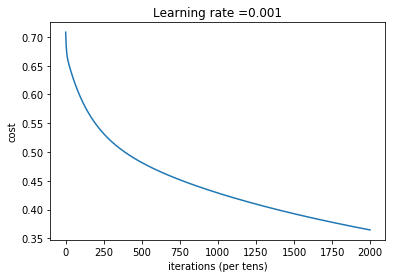

Train Accuracy: 0.36457458
Validation Accuracy: 0.55319834


In [99]:
B_params = fit(bX_resampled, bY_resampled, b_val_X, b_val_Y, epochs=2000)

In [100]:
b_test = pd.read_csv("data/B_hhold_test.csv", index_col='id')

In [101]:
b_test = impute_vals(b_test)

In [102]:
b_test = b_test.fillna(0)

In [103]:
b_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 9135 to 52739
Columns: 441 entries, RzaXNcgd to country
dtypes: float64(9), int64(14), object(418)
memory usage: 5.4+ MB


In [104]:
b_filledX.columns

Index(['wJthinfa', 'ZvEApWrk', 'vuQrLzvK', 'FGWqGkmD', 'qrOrXLPM', 'BXOWgPgL',
       'umkFMfvA', 'McFBIGsm', 'NjDdhqIe', 'rCVqiShm',
       ...
       'rljjAmaN_akDoa', 'rljjAmaN_fEsQq', 'rljjAmaN_gPPdN', 'ChbSWYhO_BgSQe',
       'ChbSWYhO_Enull', 'ChbSWYhO_LgZDV', 'ChbSWYhO_OPpaN', 'ChbSWYhO_fWqni',
       'ChbSWYhO_zmaYX', 'country_B'],
      dtype='object', length=1432)

In [105]:
b_test = pre_process_data(b_test, enforce_cols=b_filledX.columns)

input shape	(1604, 441)
After standardization	(1604, 441)
After one hot encoding of categoricals	(1604, 1419)


In [106]:
b_test.head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,euTESpHe_zVwQw,jueNqsUo_iMkzP,kmXNWkcV_WklDI,knRcLhxE_jUKCa,mMDEItQt_vSoYe,pKbELQat_xiPTV,qJMRBMxu_uBCoo,tkkjBJlG_QUfCR,uHXkmVcG_hZDNP,yZSARGEo_zfzTV
id,,,,,,,,,,,,,,,,,,,,,
9135,-0.749544,-0.719298,0.935719,9.618231e-01,-0.926144,-2.625072e-01,-7.967168e-14,-6.359296e-01,-0.685444,0.563975,...,0,0,0,0,0,0,0,0,0,0
117,0.615895,0.371780,0.795240,-2.153636e-14,0.241729,8.601754e-01,-7.967168e-14,8.853570e-01,0.399661,-0.202876,...,0,0,0,0,0,0,0,0,0,0
29085,-0.749544,-0.537452,-1.887912,-2.153636e-14,0.241729,-9.361168e-01,-7.967168e-14,1.605035e-02,-0.504593,0.563975,...,0,0,0,0,0,0,0,0,0,0
55442,0.274535,0.068703,0.373802,-2.385624e-01,1.409603,-4.594832e-15,-7.967168e-14,2.058932e-15,0.098243,0.372262,...,0,0,0,0,0,0,0,0,0,0
29281,0.615895,-0.234375,0.865480,9.618231e-01,0.241729,-1.385190e+00,-7.967168e-14,1.102684e+00,-0.203175,0.563975,...,0,0,0,0,0,0,0,0,0,0


In [107]:
b_test = b_test.transpose()
b_test.head()

id,9135,117,29085,55442,29281,63854,87565,64033,395,64544,...,45834,80366,71375,35744,46099,30519,64794,33971,28104,52739
wJthinfa,-0.749544,6.158947e-01,-7.495443e-01,0.274535,0.615895,-0.749544,2.745349e-01,-4.081845e-01,-1.432264,9.572544e-01,...,-1.773623e+00,-1.773623e+00,-7.495443e-01,1.298614e+00,-4.081845e-01,-1.090904e+00,2.745349e-01,-7.495443e-01,2.745349e-01,-0.408185
ZvEApWrk,-0.719298,3.717798e-01,-5.374520e-01,0.068703,-0.234375,-0.234375,1.887166e+00,-5.374520e-01,-0.234375,3.717798e-01,...,-5.374520e-01,-2.343747e-01,3.717798e-01,-2.343747e-01,-2.343747e-01,-4.162211e-01,-2.343747e-01,-2.343747e-01,2.796398e+00,0.068703
vuQrLzvK,0.935719,7.952399e-01,-1.887912e+00,0.373802,0.865480,0.865480,-4.763505e-02,1.286917e+00,-1.396235,1.005959e+00,...,-4.831204e-01,-4.763505e-02,-1.396235e+00,1.427396e+00,1.062150e+00,1.286917e+00,-1.045037e+00,1.357157e+00,-1.466475e+00,-0.328593
FGWqGkmD,0.961823,-2.153636e-14,-2.153636e-14,-0.238562,0.961823,-1.438948,-2.153636e-14,-2.153636e-14,-1.438948,-2.153636e-14,...,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-2.153636e-14,-0.238562
qrOrXLPM,-0.926144,2.417294e-01,2.417294e-01,1.409603,0.241729,1.409603,-9.261440e-01,2.417294e-01,-0.926144,-9.261440e-01,...,2.417294e-01,-2.094017e+00,2.417294e-01,2.417294e-01,2.417294e-01,2.417294e-01,2.417294e-01,2.417294e-01,1.409603e+00,0.241729


In [108]:
b_pred = predict_final(B_params, b_test)

In [109]:
b_pred

array([[0.0858404 , 0.0740587 , 0.16245681, ..., 0.04937811, 0.10530246,
        0.1093152 ]], dtype=float32)

In [110]:
b_pred = b_pred.flatten()
b_pred.shape

(1604,)

In [111]:
b_id = b_test.columns.tolist()

In [112]:
B = pd.DataFrame(data={'id':b_id, 'poor':b_pred})

In [113]:
B.set_index('id', inplace=True)
B.head()

,poor
id,
9135,0.085840
117,0.074059
29085,0.162457
55442,0.045041
29281,0.106026


In [114]:
b_over = B[B.poor >= 0.5]
b_over

,poor
id,
49456,0.630711
20369,0.556456
63138,0.617345
36966,0.684416
65640,0.506975
78307,0.534193
75717,0.595730
4661,0.685891
68883,0.561602


In [115]:
B['country'] = 'B'

In [116]:
B = B[['country', 'poor']]
B.head()

,country,poor
id,,
9135,B,0.085840
117,B,0.074059
29085,B,0.162457
55442,B,0.045041
29281,B,0.106026


In [117]:
B

,country,poor
id,,
9135,B,0.085840
117,B,0.074059
29085,B,0.162457
55442,B,0.045041
29281,B,0.106026
63854,B,0.199565
87565,B,0.142822
64033,B,0.147321
395,B,0.117715


In [118]:
B.to_csv('B2.csv')